In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
def info():
    inf = pd.DataFrame(index=data.columns)
    inf['data_type'] = data.dtypes
    inf['null_count'] = data.isnull().sum()
    inf['unique_count'] = data.nunique()
    return inf

In [5]:
info()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [6]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
data.shape

(10841, 13)

In [8]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [9]:
boolean = data['App'].duplicated().any()
boolean

True

In [10]:
data['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
8 Ball Pool                                          7
ESPN                                                 7
                                                    ..
USMLE Step 2 CK Cards Lite                           1
Magoosh GMAT Prep & Practice                         1
A-J Media Vault                                      1
video player for android                             1
Abs Training-Burn belly fat                          1
Name: App, Length: 9660, dtype: int64

In [11]:
data.drop_duplicates(inplace=True)
#We have removed the duplicates

In [12]:
#1.9 is a wront value for category, so we have to find in which row it is
data[data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
categories = list(data["Category"].unique())
print("There are {0:.0f} categories! (Excluding/Removing Category 1.9)".format(len(categories)-1))
print(categories)
categories.remove('1.9')

There are 33 categories! (Excluding/Removing Category 1.9)
['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', '1.9']


In [14]:
a = data.loc[data["Category"] == "1.9"]
print(a.head())
print("This mislabeled app category affects {} app at index {}.".format(len(a),int(a.index.values)))
data = data.drop(int(a.index.values),axis=0)

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  
This mislabeled app category affects 1 app at index 10472.


In [15]:
modeValueRating = data['Rating'].mode()
#We have used mode() function to fill the null values in Rating column

In [16]:
data['Rating'].fillna(value=modeValueRating[0], inplace = True)

<AxesSubplot:>

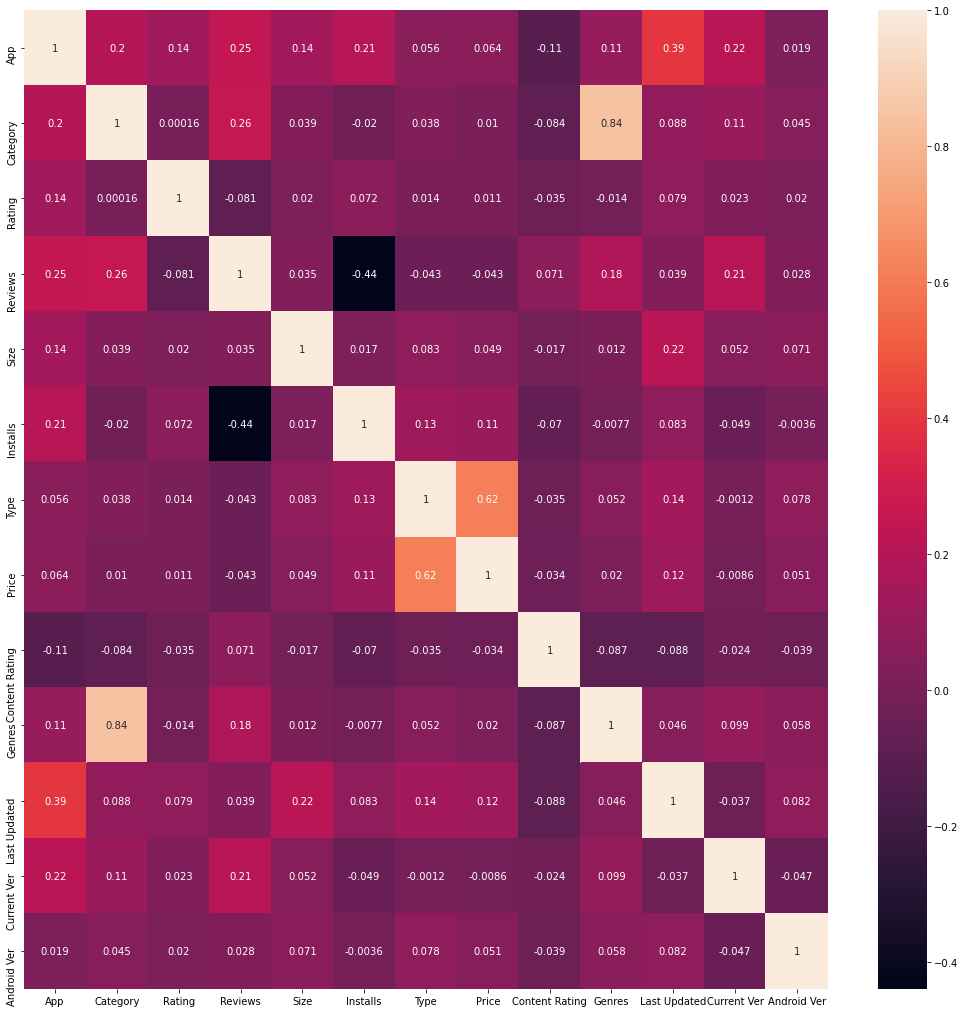

In [17]:
corr = data.apply(lambda x: x.factorize()[0]).corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)

In [18]:
popApps = data.copy()
popApps = popApps.drop_duplicates()
popApps["Installs"] = popApps["Installs"].str.replace("+","") 
popApps["Installs"] = popApps["Installs"].str.replace(",","")
popApps["Installs"] = popApps["Installs"].astype("int64")
popApps["Price"] = popApps["Price"].str.replace("$","")
popApps["Price"] = popApps["Price"].astype("float64")
popApps["Size"] = popApps["Size"].str.replace("Varies with device","0")
popApps["Size"] = (popApps["Size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
        popApps["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))
popApps["Reviews"] = popApps["Reviews"].astype("int64")
popApps["Type"] = (popApps["Type"] == "Paid").astype(int)
popApps = popApps.sort_values(by="Installs",ascending=False)
popApps.reset_index(inplace=True)
popApps.drop(["index"],axis=1,inplace=True)
popApps.loc[:40,['App','Installs','Content Rating', 'Rating']]
#Top 40 Apps that should be considered to be used for advertisements

,App,Installs,Content Rating,Rating
0,Hangouts,1000000000,Everyone,4.0
1,YouTube,1000000000,Teen,4.3
2,Gmail,1000000000,Everyone,4.3
3,Google Chrome: Fast & Secure,1000000000,Everyone,4.3
4,Subway Surfers,1000000000,Everyone 10+,4.5
5,Google Drive,1000000000,Everyone,4.4
6,Google Photos,1000000000,Everyone,4.5
7,Google Play Games,1000000000,Teen,4.3
8,Google Photos,1000000000,Everyone,4.5
9,Google Chrome: Fast & Secure,1000000000,Everyone,4.3


In [19]:
popAppsCopy = popApps.copy()
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Category'. 
popAppsCopy['Category']= label_encoder.fit_transform(popAppsCopy['Category']) 
popAppsCopy['Content Rating']= label_encoder.fit_transform(popAppsCopy['Content Rating']) 
popAppsCopy['Genres']= label_encoder.fit_transform(popAppsCopy['Genres']) 
popAppsCopy.dtypes

App                object
Category            int32
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type                int32
Price             float64
Content Rating      int32
Genres              int32
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [20]:
popAppsCopy = popAppsCopy.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1)
print("There are {} total rows.".format(popAppsCopy.shape[0]))
countPop = popAppsCopy[popAppsCopy["Installs"] > 100000].count()
print("{} Apps are Popular!".format(countPop[0]))
print("{} Apps are Unpopular!\n".format((popAppsCopy.shape[0]-countPop)[0]))
print("For an 80-20 training/test split, we need about {} apps for testing\n".format(popAppsCopy.shape[0]))
popAppsCopy["Installs"] = (popAppsCopy["Installs"] > 100000)*1 

testPop1 = popAppsCopy[popAppsCopy["Installs"] == 1].sample(999,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop1.index)
print("Values were not dropped from training dataframe.",testPop1.index[0] in popAppsCopy.index)

testPop0 = popAppsCopy[popAppsCopy["Installs"] == 0].sample(1000,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop0.index)
print("Values were not dropped from training dataframe.",testPop0.index[0] in popAppsCopy.index)

testDf = testPop1.append(testPop0)
trainDf = popAppsCopy

#Shuffle rows in test & training data set
testDf = testDf.sample(frac=0.9,random_state=0).reset_index(drop=True)
trainDf = trainDf.sample(frac=0.9,random_state=0).reset_index(drop=True)

#Form training and test data split
y_train = trainDf.pop("Installs")
X_train = trainDf.copy()
y_test = testDf.pop("Installs")
X_test = testDf.copy()

X_train = X_train.drop(['Reviews', 'Rating'], axis=1) 
X_test = X_test.drop(['Reviews', 'Rating'], axis=1)

There are 10357 total rows.
4571 Apps are Popular!
5786 Apps are Unpopular!

For an 80-20 training/test split, we need about 10357 apps for testing

Values were not dropped from training dataframe. False
Values were not dropped from training dataframe. False


In [21]:
print("{} Apps are used for Training.".format(y_train.count()))
print("{} Apps are used for Testing.".format(y_test.count()))
X_train.head(3)

7522 Apps are used for Training.
1799 Apps are used for Testing.


,Category,Size,Type,Price,Content Rating,Genres
0,27,3900000.0,0,0.0,1,101
1,11,0.0,0,0.0,1,43
2,14,29000000.0,0,0.0,4,26


In [22]:
popularity_classifier = DecisionTreeClassifier(max_leaf_nodes=50, random_state=10)
popularity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=50, random_state=10)

In [23]:
predictions1 = popularity_classifier.predict(X_train)
print("Predicted: ",predictions1[:50])
print("Actual:    ",np.array(y_train[:50]))

Predicted:  [0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 1 0]
Actual:     [1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0
 1 1 0 1 0 1 1 1 0 1 0 1 0]


In [24]:
train_accuracy=accuracy_score(y_true = y_train, y_pred = predictions1)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7611007710715235


In [25]:
predictions2 = popularity_classifier.predict(X_test)
print("Predicted: ",predictions2[:50])
print("Actual:    ",np.array(y_test[:50]))
X_test.head(3)

Predicted:  [1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0
 1 0 0 1 0 0 0 1 1 1 0 1 0]
Actual:     [1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0
 1 1 1 1 0 0 1 1 1 1 1 0 0]


,Category,Size,Type,Price,Content Rating,Genres
0,14,77000000.0,0,0.00,4,104
1,20,899000.0,1,2.99,1,71
2,16,7700000.0,0,0.00,1,65


In [26]:
test_accuracy=accuracy_score(y_true = y_test, y_pred = predictions2)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7520844913841023


In [27]:
X_testCopy = X_test.copy()
X_testCopy["Popular?"] = y_test
X_testCopy[X_test["Size"] == 3600000].head(10)

,Category,Size,Type,Price,Content Rating,Genres,Popular?
176,7,3600000.0,0,0.00,1,38,0
199,11,3600000.0,0,0.00,3,52,0
333,26,3600000.0,0,0.00,1,96,0
545,29,3600000.0,0,0.00,1,108,0
773,11,3600000.0,0,0.00,1,52,0
1079,29,3600000.0,0,0.00,1,108,0
1180,29,3600000.0,0,0.00,1,108,1
1332,1,3600000.0,0,0.00,1,13,0
1402,11,3600000.0,1,1.49,4,52,0
1446,11,3600000.0,0,0.00,1,52,0


In [28]:
print("the Size, Type, Price, Content Rating, and Genre features should all be used to most accurately determine if an app will gain maximum installs. We cannot use ratings and reviews to determine the max installs as we can see in the graphs obove of the top 40 apps that not all of the apps are having high ratings. Some of them even have rating of less than 4.0 which may be considered to be less but their no. of installs is still higher so ratings and reviews won't be good choice of data to be used.")

the Size, Type, Price, Content Rating, and Genre features should all be used to most accurately determine if an app will gain maximum installs. We cannot use ratings and reviews to determine the max installs as we can see in the graphs obove of the top 40 apps that not all of the apps are having high ratings. Some of them even have rating of less than 4.0 which may be considered to be less but their no. of installs is still higher so ratings and reviews won't be good choice of data to be used.


# In the below part, we have used the data from csv file to analuze data and make graphs using different parameters to be used by different businesses for different purposes.

In [29]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [30]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Rating'].dtype

dtype('float64')

In [31]:
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [32]:
data[data['Reviews'] =='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [33]:
data['Reviews'] = data.Reviews.replace("0.0",0)
data['Reviews'] = data.Reviews.replace("3.0M",3000000.0)
data['Reviews'] = data['Reviews'].astype(float)
data['Reviews'].dtype

dtype('float64')

In [34]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [35]:
data['Size'] = data.Size.replace("Varies with device",np.nan)
#We have replaced 'Varies with device' rows in 'Size' column with 'Nan' as it doesn't have a speific value and we need to convert datatype from object to float. And using mode() or any other function to fill the rows with 'Varies with device' could lead to hughe amount og changes in data and inefficiency in results
data['Size'] = data.Size.str.replace("M","000") 
data['Size'] = data.Size.str.replace("k","")
data['Size'] = data.Size.replace("1,000+",1000)
data['Size'] =data['Size'].astype(float)
data['Size'].dtype

dtype('float64')

In [36]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [37]:
data['Installs'] = data.Installs.str.replace(",","")
data['Installs'] = data.Installs.str.replace("+","")
data['Installs'] = data.Installs.replace("Free",np.nan)
data['Installs'] = data['Installs'].astype(float)
data['Installs'].dtype
#We have made changes in rows of 'Installs' we have made changes to make them analyzable and change datatype to float

dtype('float64')

In [38]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [39]:
data['Price'] = data.Price.replace("Everyone",np.nan)
data['Price'] = data.Price.str.replace("$","").astype(float)
data['Price'].dtype
#We have removed $ sign to get all 'Price' data in float format

dtype('float64')

In [40]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [41]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10357, dtype: datetime64[ns]

In [42]:
boolean = data['App'].duplicated().any()
boolean

True

In [43]:
data['App'].value_counts()

ROBLOX                           9
8 Ball Pool                      7
Zombie Catchers                  6
Bubble Shooter                   6
Helix Jump                       6
                                ..
Ek IRA                           1
Colorfit - Drawing & Coloring    1
Safeway                          1
RETRO Shocked DW-6000            1
Abs Training-Burn belly fat      1
Name: App, Length: 9659, dtype: int64

In [44]:
data.drop_duplicates(inplace=True)
#We have removed the duplicates

Text(0, 0.5, 'Category')

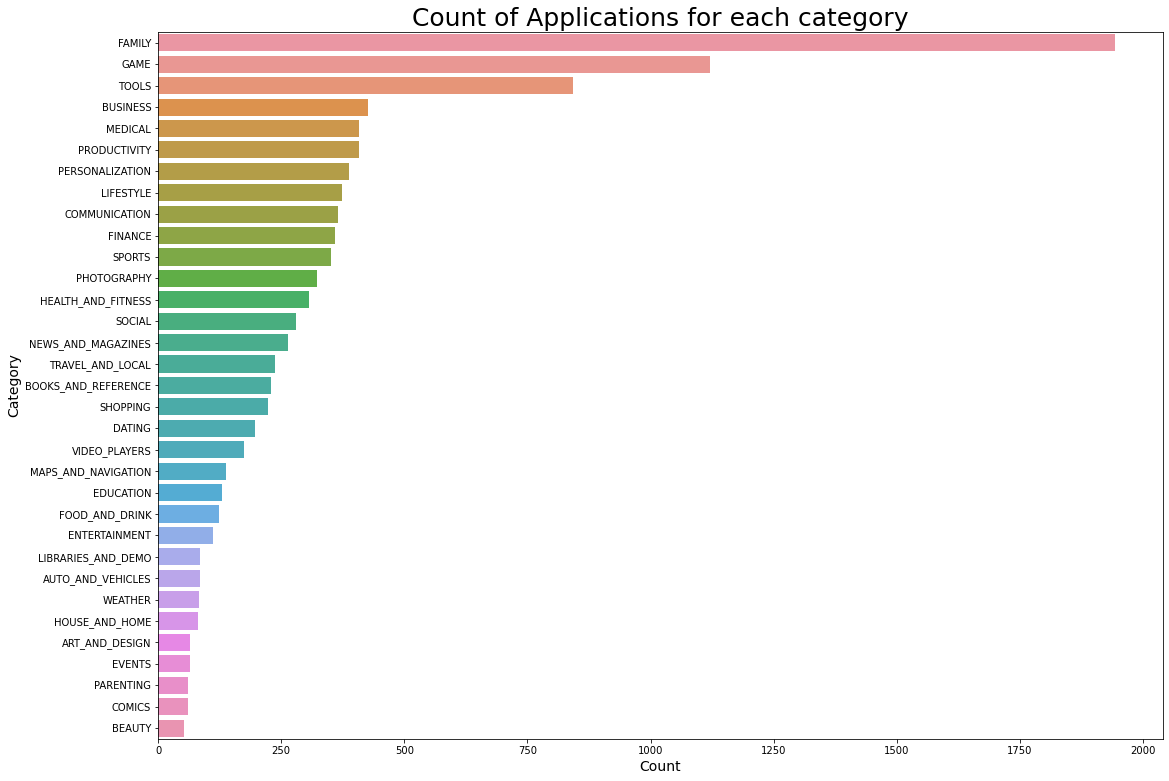

In [45]:
plt.figure(figsize=(18,13))
xxis = data.Category.value_counts()
graph = sns.barplot(x=xxis, y=xxis.index, data=data)
graph.set_title("Count of Applications for each category", fontsize = 25);
plt.xlabel("Count", fontsize = 14)
plt.ylabel("Category", fontsize = 14)

In [46]:
category_list = list(data['Category'].unique())
category_review = []
for i in category_list:
    x = data[data['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)

In [47]:
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

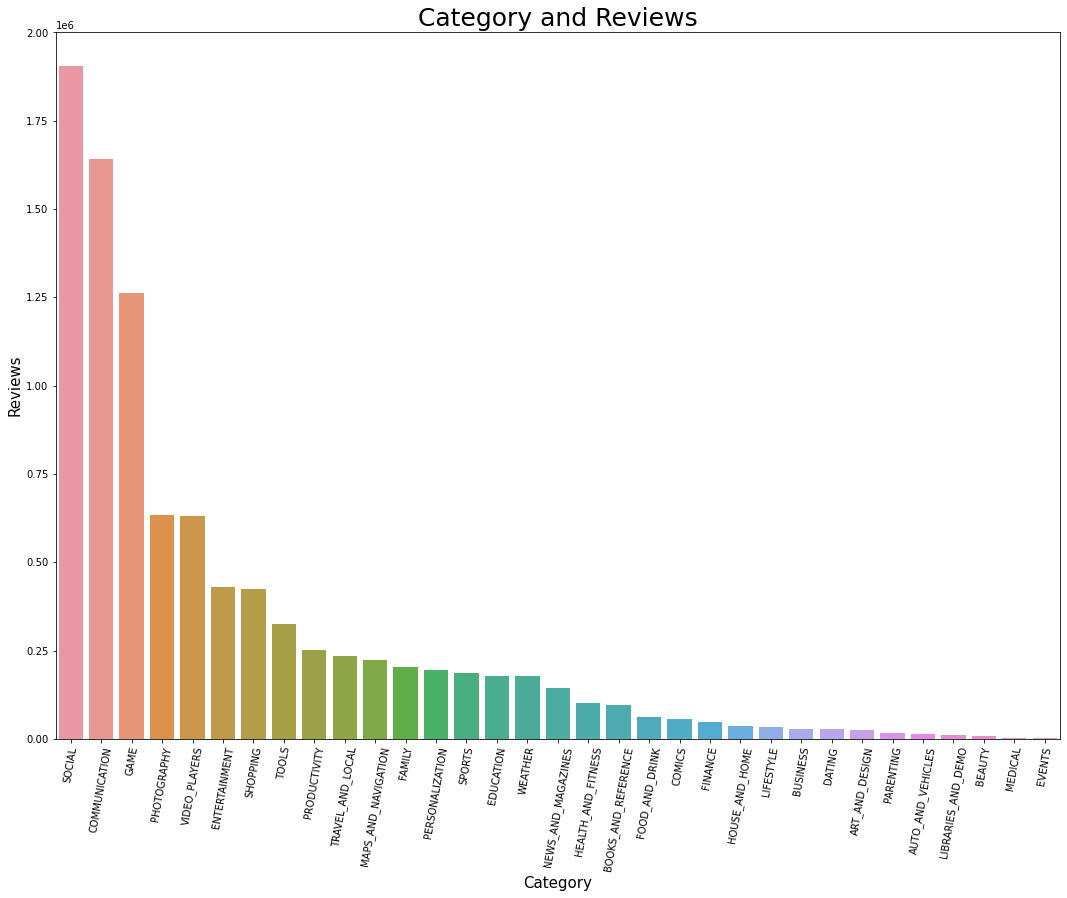

In [48]:
plt.figure(figsize=(18,13))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category", fontsize = 15)
plt.ylabel("Reviews", fontsize = 15)
plt.title("Category and Reviews", fontsize = 25)
plt.show()

In [49]:
category_list = list(data['Category'].unique())
category_install = []
for i in category_list:
    x = data[data['Category'] == i]
    if(len(x)!=0):
        install = sum(x.Installs)/len(x)
        category_install.append(install)
    else:
        install = sum(x.Installs)
        category_install.append(install)

In [50]:
data_category_install = pd.DataFrame({'category': category_list,'install':category_install})
new_index = (data_category_install['install'].sort_values(ascending=False)).index.values
sorted_data =data_category_install.reindex(new_index)

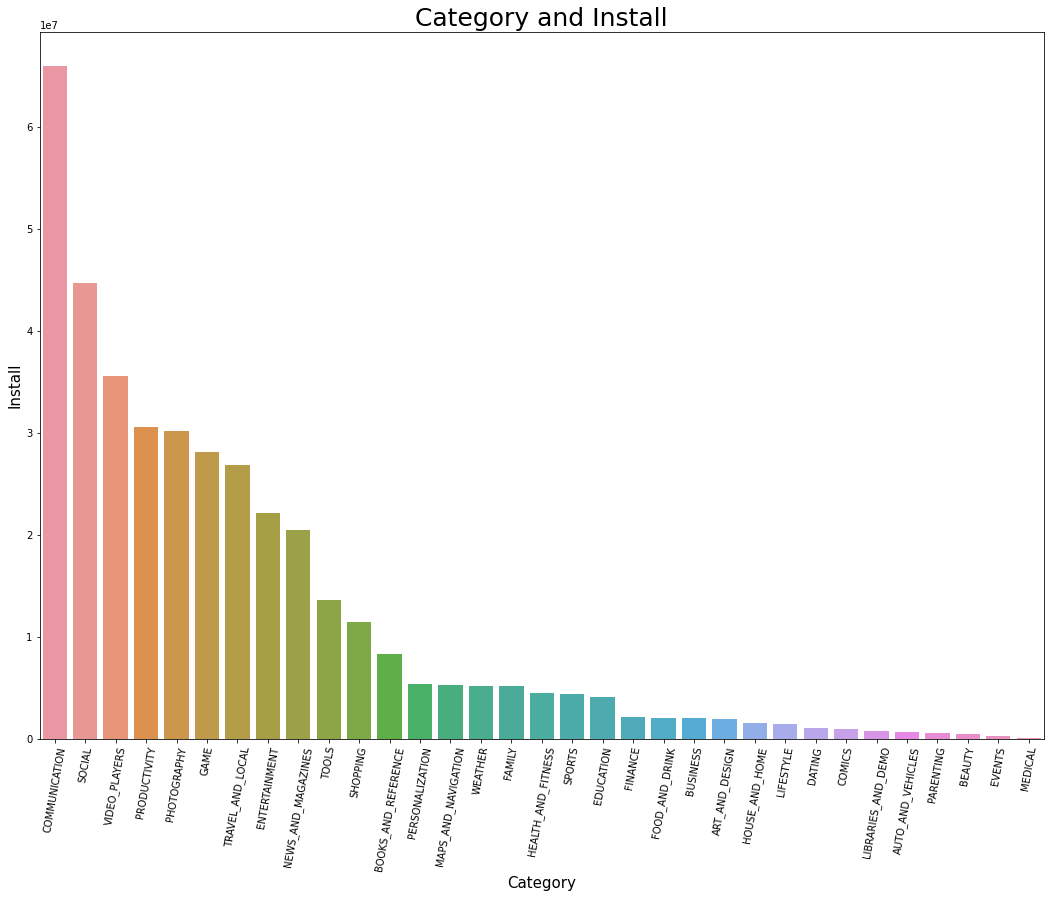

In [51]:
plt.figure(figsize=(18,13))
sns.barplot(x=sorted_data['category'], y=sorted_data['install'])
plt.xticks(rotation=80)
plt.xlabel("Category", fontsize = 15)
plt.ylabel("Install", fontsize = 15)
plt.title("Category and Install", fontsize = 25)
plt.show()

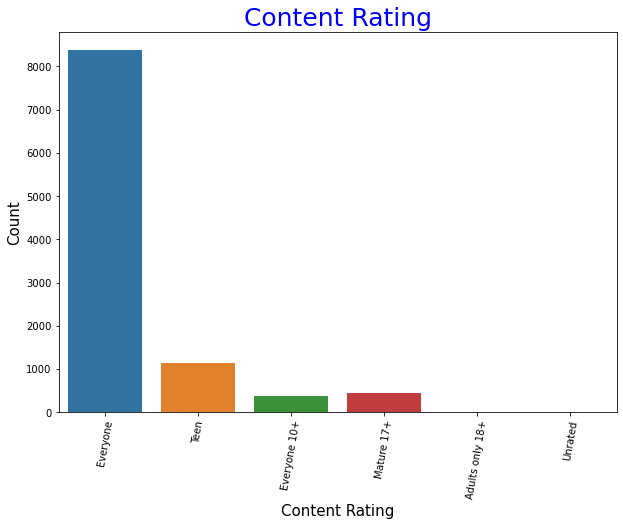

In [52]:
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'blue',fontsize=25)
plt.xlabel("Content Rating", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

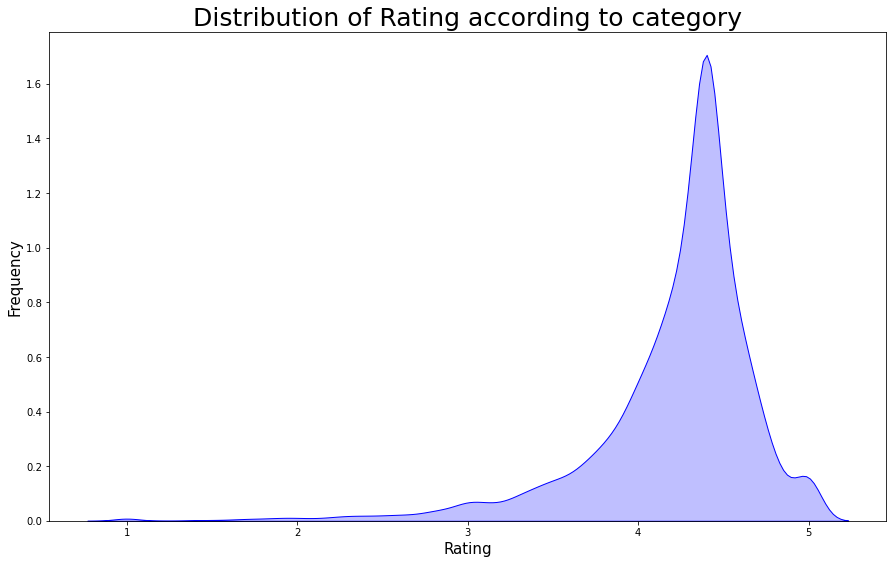

In [53]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
graph = sns.kdeplot(data.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating according to category',size = 25);

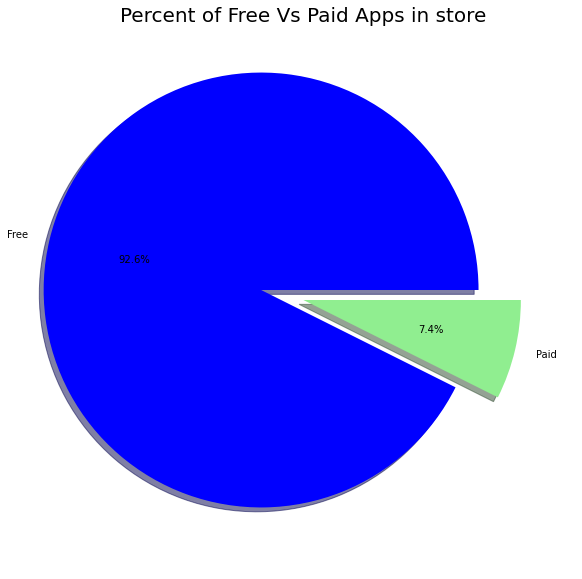

In [54]:
plt.figure(figsize=(10,10))
labels = data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()
#The percentages in the pie chart are exactly same what we had cheked in Excel CSV file

In [55]:
app_count = data.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})

In [56]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

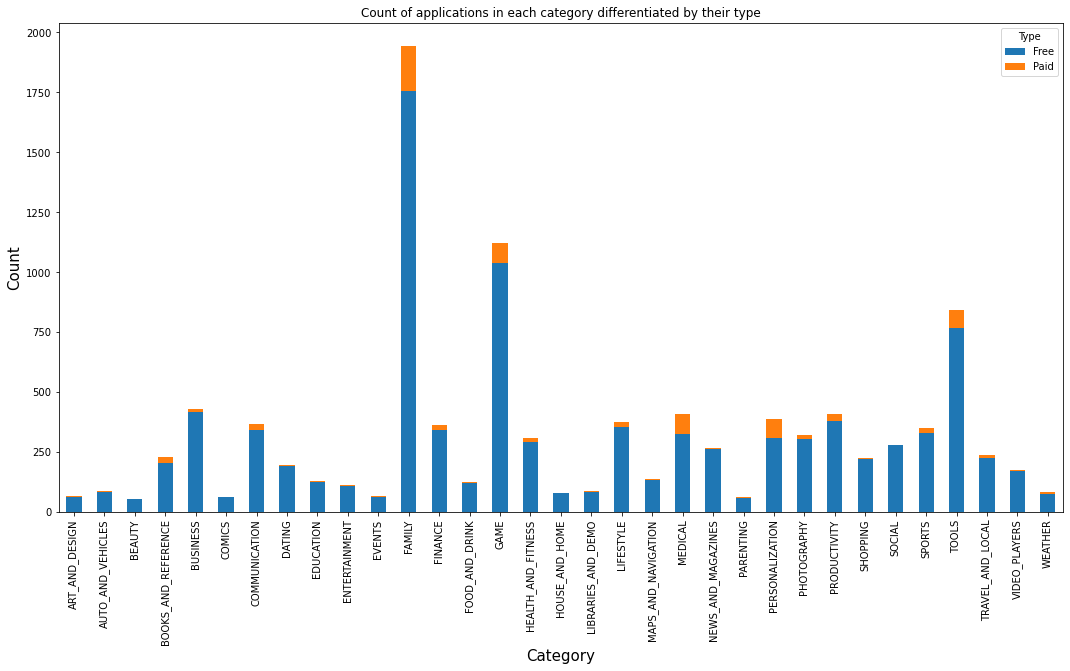

In [57]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

In [58]:
data['Gaming Category App'] = data['Category']=='GAME'

In [59]:
categoty_type_installs = data.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [60]:
categoty_type_installs['log_Installs'] = np.log10(categoty_type_installs['Installs'])

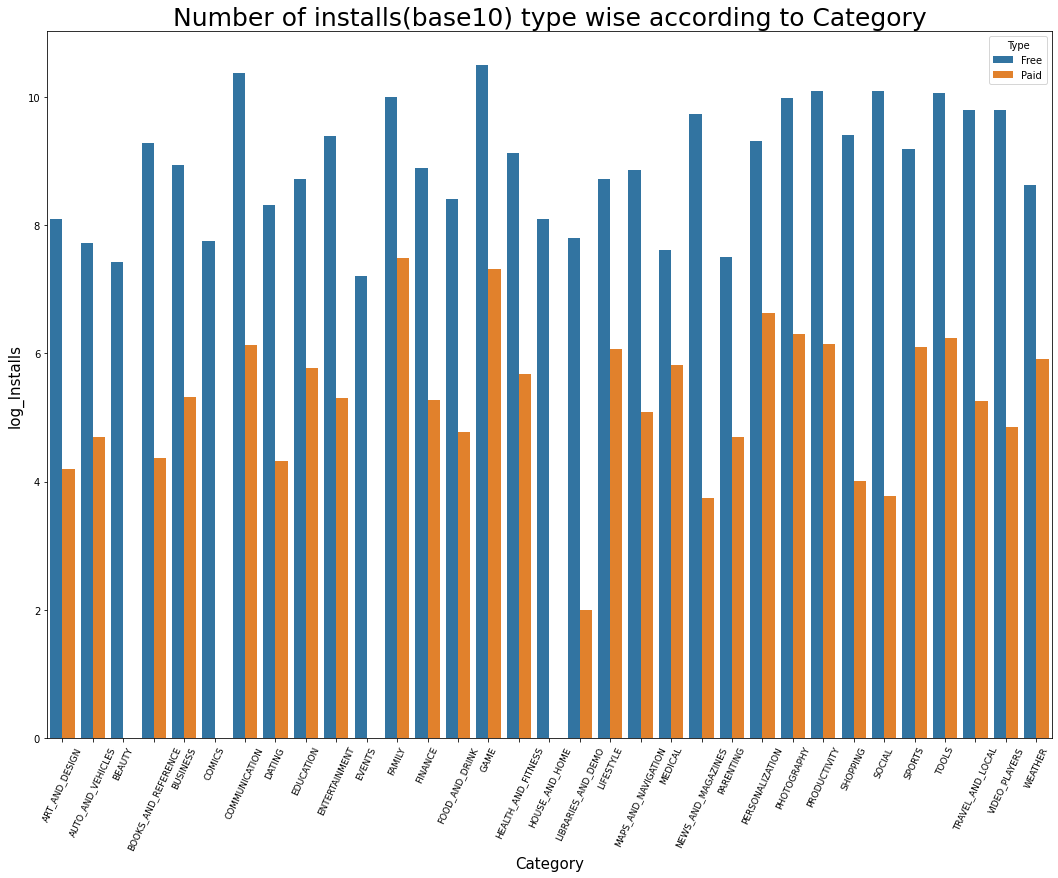

In [61]:
plt.figure(figsize=(18,13))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category", fontsize = 15)
plt.ylabel("Installs(base10)", fontsize = 15)
plt.title("Number of installs(base10) type wise according to Category", fontsize = 25)
sns.barplot('Category', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

In [62]:
# We have Converted KB to MB 
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x))

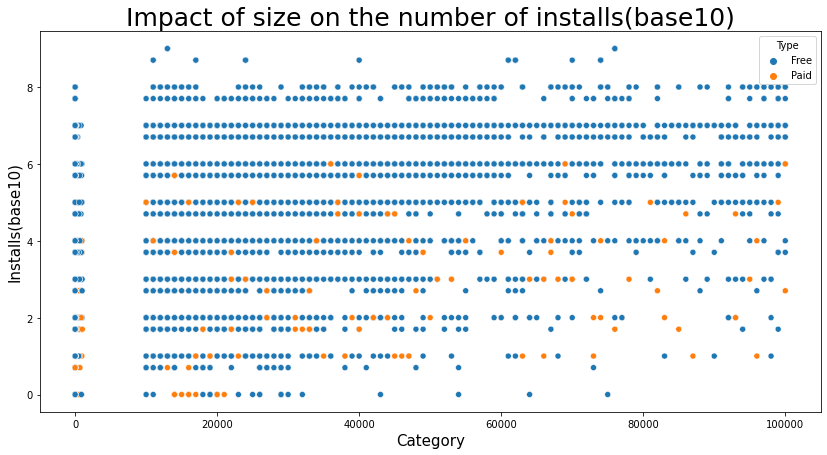

In [63]:
data['log_installs'] = np.log10(data['Installs'])
plt.figure(figsize=(14,7))
plt.title("Impact of size on the number of installs(base10)", fontsize = 25)
sns.scatterplot(data['Size'], data['log_installs'], hue=data['Type'])
plt.xlabel("Category", fontsize = 15)
plt.ylabel("Installs(base10)", fontsize = 15)
plt.show()

In [64]:
topAppsinGenres = data['Genres'].value_counts().head(50)

xxis = []
yxis = []

for i in range(len(topAppsinGenres)):
    xxis.append(topAppsinGenres.index[i])
    yxis.append(topAppsinGenres[i])

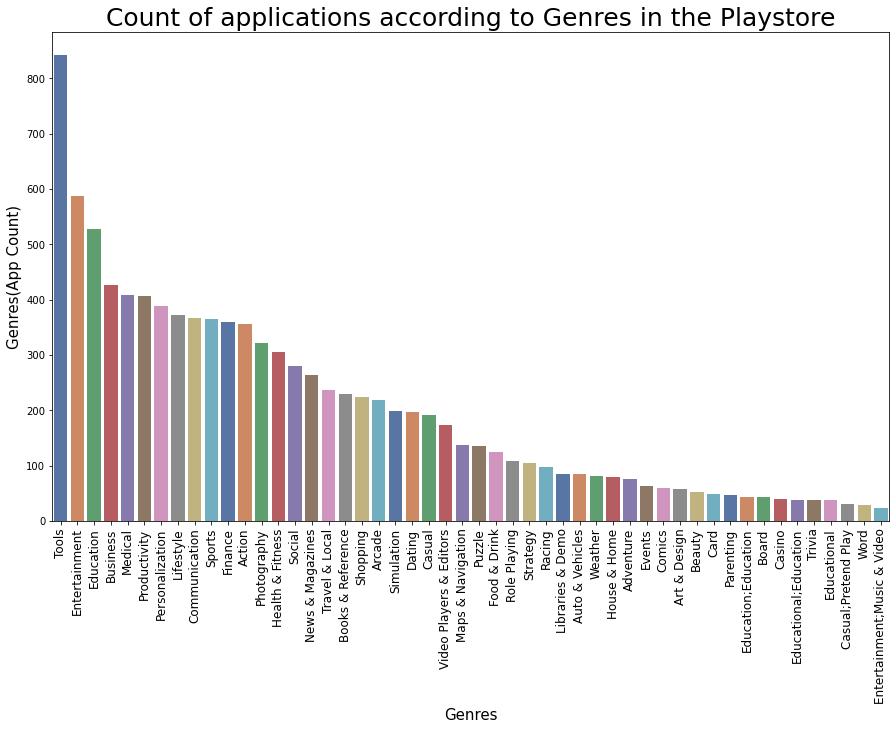

In [65]:
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)', fontsize = 15)
plt.xlabel('Genres', fontsize = 15)
graph = sns.barplot(x=xxis,y=yxis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Count of applications according to Genres in the Playstore", fontsize = 25);

In [66]:
top_genres = data.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [67]:
genres_installs = data.groupby(['Genres'])[['Installs']].sum()

In [68]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_25_genres_installs = top_genres_installs.head(25)

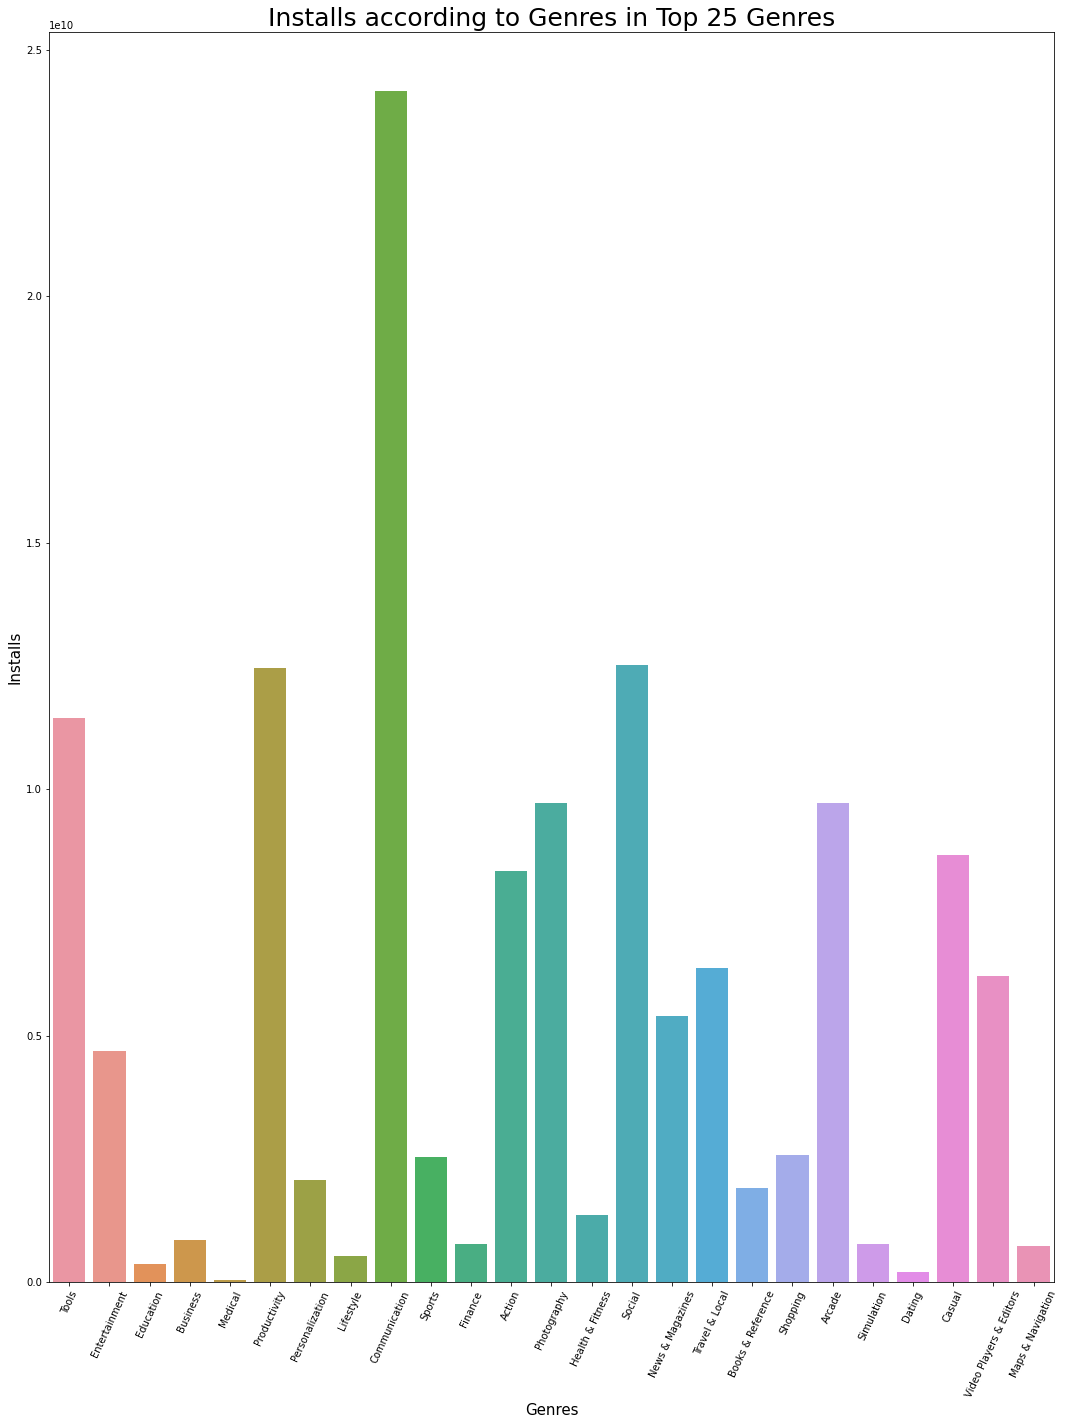

In [69]:
plt.figure(figsize=(18,23))
plt.xticks(rotation=65)
plt.xlabel("Genres", fontsize = 15)
plt.ylabel("Installs", fontsize = 15)
plt.title("Installs according to Genres in Top 25 Genres", fontsize = 25)
sns.barplot(top_25_genres_installs.Genres, top_25_genres_installs.Installs)
plt.show()

In [70]:
genres_ratings_df = data.groupby(['Genres'])[['Rating']].mean()
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)
highest_rated_genres = genres_installs_ratings.iloc[0:25]
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

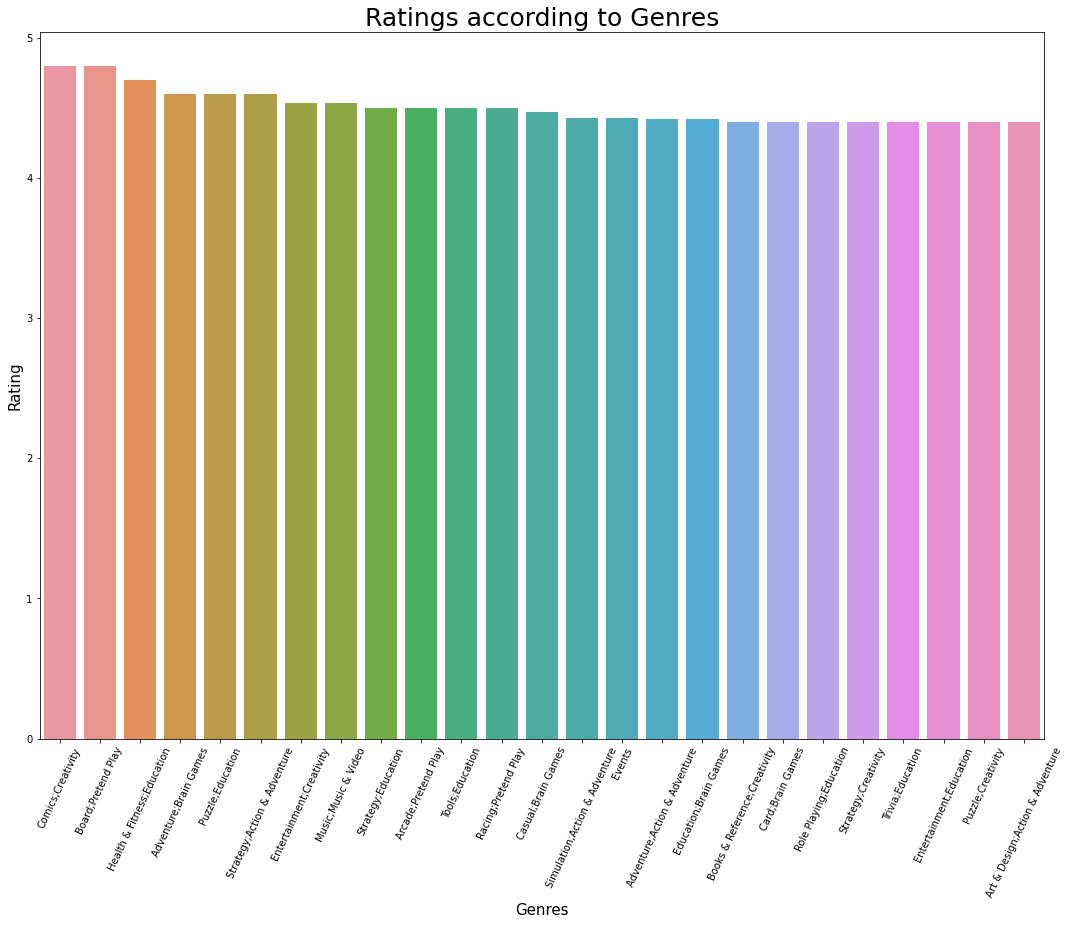

In [71]:
plt.figure(figsize=(18,13))
plt.xticks(rotation=65)
plt.xlabel("Genres", fontsize = 15)
plt.ylabel("Rating", fontsize = 15)
plt.title("Ratings according to Genres", fontsize = 25)
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

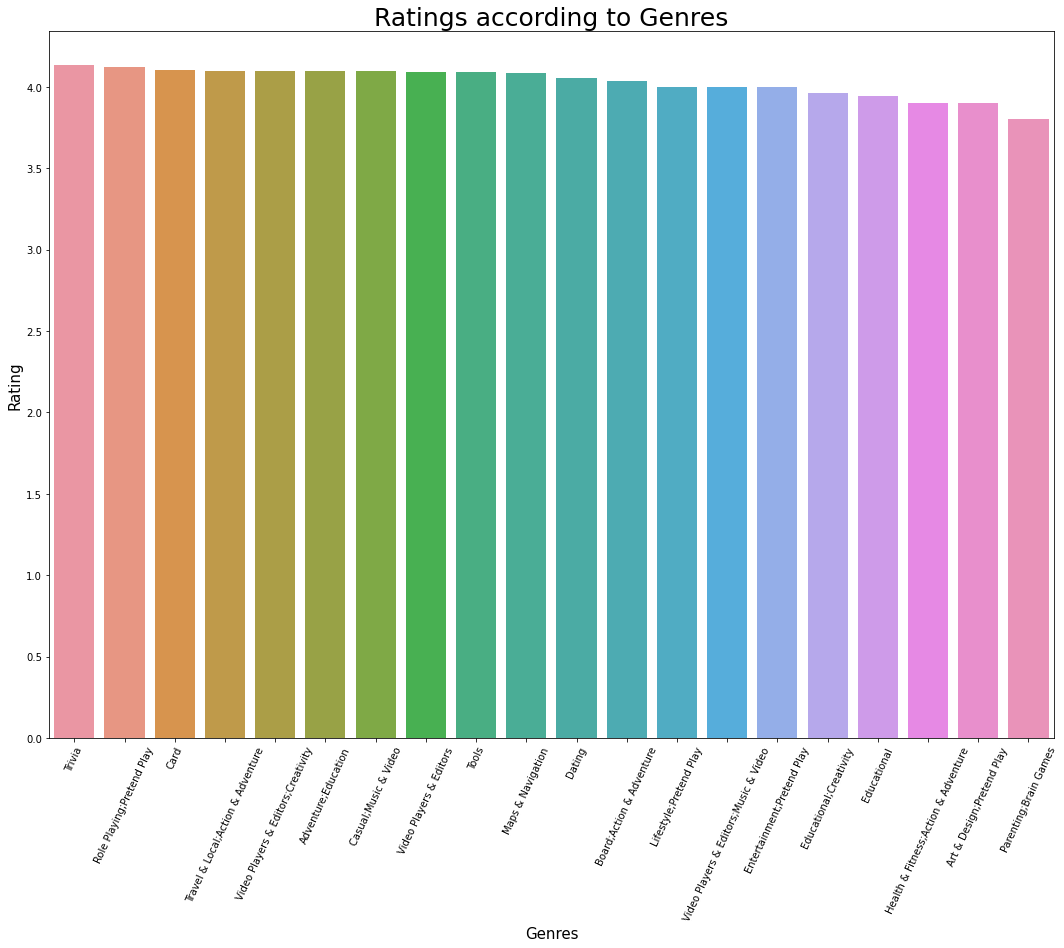

In [72]:
plt.figure(figsize=(18,13))
plt.xticks(rotation=65)
plt.xlabel("Genres", fontsize = 15)
plt.ylabel("Rating", fontsize = 15)
plt.title("Ratings according to Genres", fontsize = 25)
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating)
plt.show()

In [73]:
Apps_with_Highest_reviews = data.sort_values(by='Reviews', ascending=False).head(20)

In [74]:
Apps_with_Highest_reviews

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Gaming Category App,log_installs
2544,Facebook,SOCIAL,4.1,78158306.0,NaN,1.000000e+09,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,False,9.00000
3943,Facebook,SOCIAL,4.1,78128208.0,NaN,1.000000e+09,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,False,9.00000
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,False,9.00000
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,False,9.00000
2604,Instagram,SOCIAL,4.5,66577446.0,NaN,1.000000e+09,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,False,9.00000
2545,Instagram,SOCIAL,4.5,66577313.0,NaN,1.000000e+09,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,False,9.00000
3909,Instagram,SOCIAL,4.5,66509917.0,NaN,1.000000e+09,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,False,9.00000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,False,9.00000
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,False,9.00000
1879,Clash of Clans,GAME,4.6,44893888.0,98000.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up,True,8.00000


In [75]:
def top10incategory(str):
    str = str.upper()
    top10 = data[data['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps in Category: '+str,size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

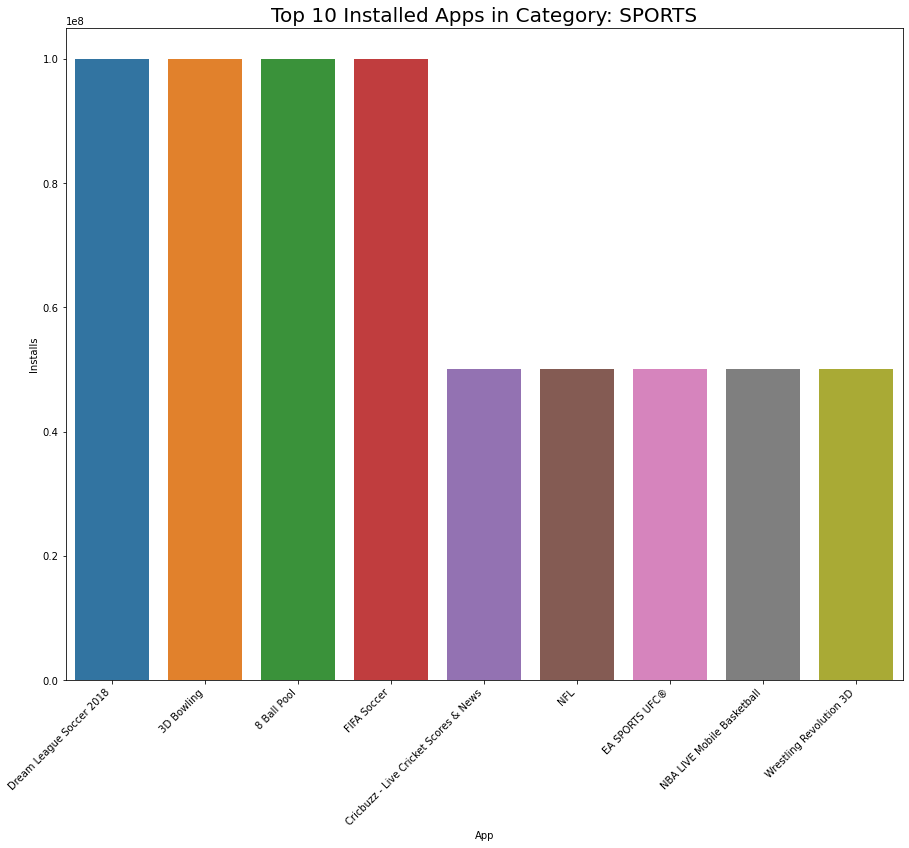

In [76]:
top10incategory('Sports')

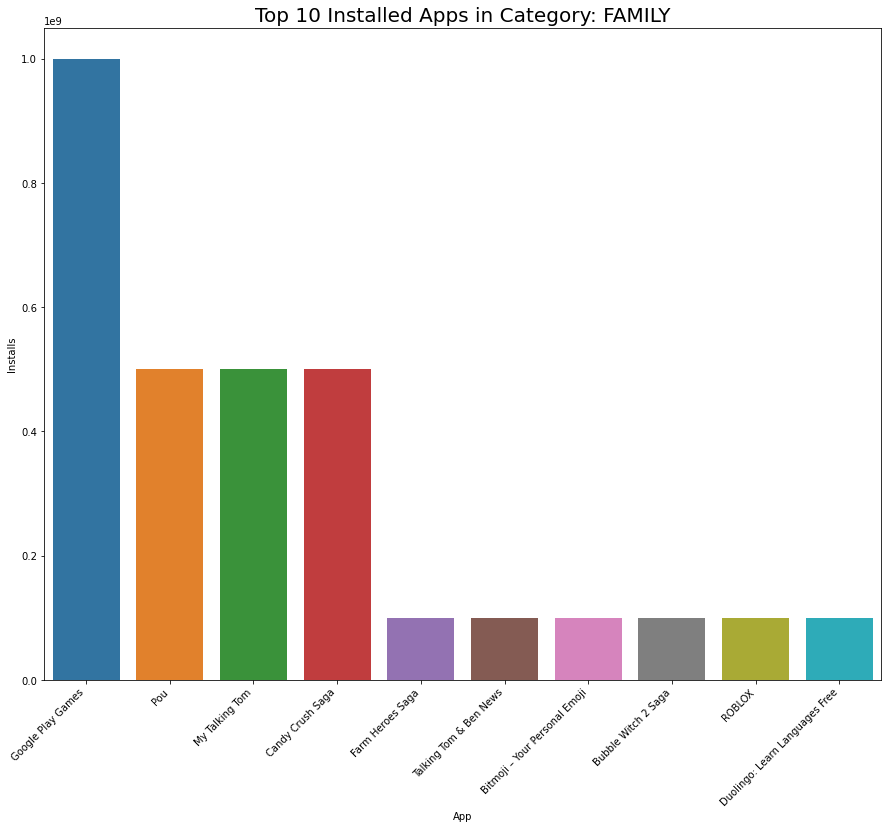

In [77]:
top10incategory('Family')

In [78]:
highest10PaidApps = data[data['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)

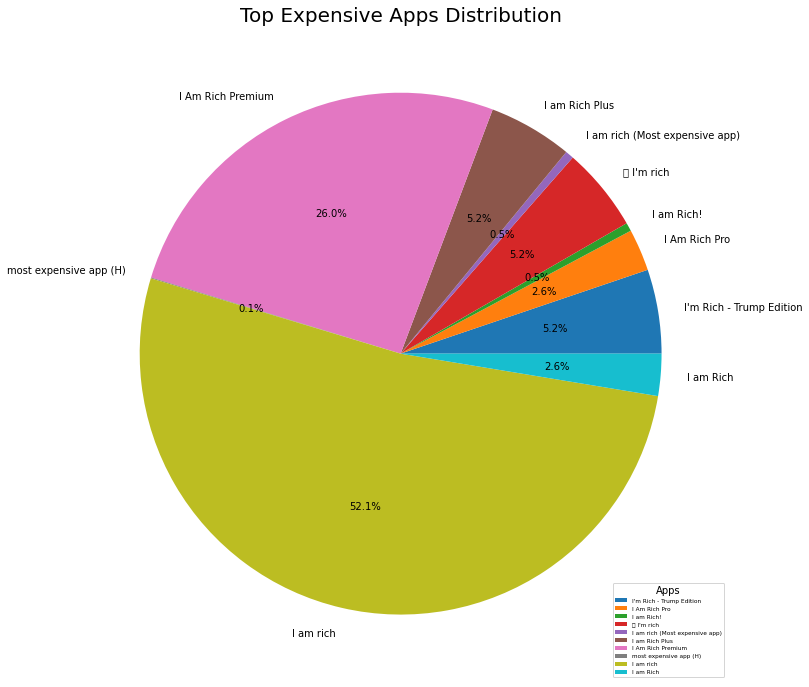

In [79]:
highest10PaidApps_df = highest10PaidApps[['App', 'Installs']].drop(9934)

plt.figure(figsize=(18,12));
plt.pie(highest10PaidApps_df.Installs, explode=None, labels=highest10PaidApps_df.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(highest10PaidApps_df.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

In [80]:
Paid_Apps = data[data['Type'] == 'Paid']
earnings = Paid_Apps[['App', 'Installs', 'Price']]
earnings['Earnings'] = earnings['Installs'] * earnings['Price'];
earnings_sortedbyEarningscolumn = earnings.sort_values(by='Earnings', ascending=False).head(50)
earnings_sortedbyPrice = earnings_sortedbyEarningscolumn.sort_values(by='Price', ascending=False)

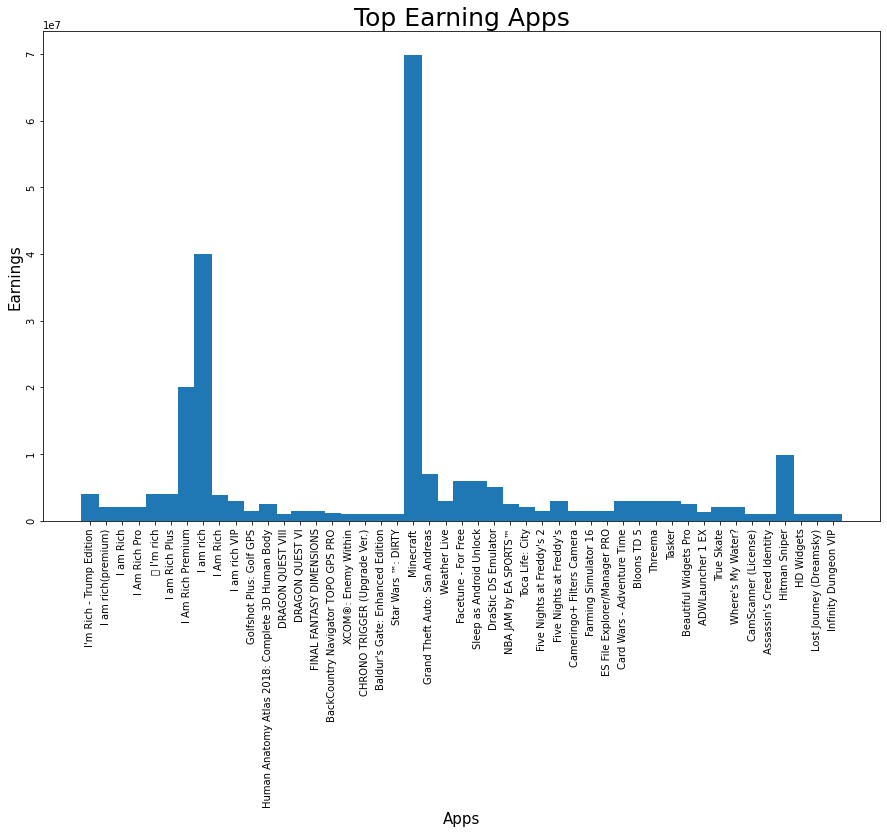

In [81]:
plt.figure(figsize=(15,9))
plt.bar(earnings_sortedbyPrice.App, earnings_sortedbyPrice.Earnings, width=1.1, label=earnings_sortedbyPrice.Earnings)
plt.xlabel("Apps", fontsize = 15)
plt.ylabel("Earnings", fontsize = 15)
plt.tick_params(rotation=90)
plt.title("Top Earning Apps", fontsize = 25);

In [82]:
top_earners = []
for i in earnings_sortedbyEarningscolumn["App"]:
    if i in top_earners:
        continue
    else:
        top_earners.append(i)
print("Top 1 st earner:", top_earners[0])
print("Top 2 nd earner:", top_earners[1])
print("Top 3 rd earner:", top_earners[2])
for i in range(3,10):
    print("Top",(i+1),"th earner:", top_earners[i] )

Top 1 st earner: Minecraft
Top 2 nd earner: I am rich
Top 3 rd earner: I Am Rich Premium
Top 4 th earner: Hitman Sniper
Top 5 th earner: Grand Theft Auto: San Andreas
Top 6 th earner: Sleep as Android Unlock
Top 7 th earner: Facetune - For Free
Top 8 th earner: DraStic DS Emulator
Top 9 th earner: I'm Rich - Trump Edition
Top 10 th earner: 💎 I'm rich
